# C3 Simulator as a backend for Qiskit Experiments

This notebook demonstrates the use of the C3 Simulator with a high-level quantum programming framework [Qiskit](https://www.qiskit.org). You must additionally install qiskit and matplotlib to run this example.

In [1]:
!pip install -q qiskit matplotlib

In [2]:
from pprint import pprint
import numpy as np
from c3.qiskit import C3Provider
from c3.qiskit.c3_gates import RX90pGate
from qiskit import transpile, execute, QuantumCircuit, Aer
from qiskit.tools.visualization import plot_histogram

## Define a basic Quantum circuit

In [3]:
qc = QuantumCircuit(3, 3)
qc.append(RX90pGate(), [0])
qc.append(RX90pGate(), [1])

In [4]:
qc.draw()

┌────────────┐
q_0: ┤ Rx90p(π/2) ├
     ├────────────┤
q_1: ┤ Rx90p(π/2) ├
     └────────────┘
q_2: ──────────────
                   
c: 3/══════════════

## Get the C3 Provider and Backend

In [5]:
c3_provider = C3Provider()
c3_backend = c3_provider.get_backend("c3_qasm_physics_simulator")

In [6]:
config = c3_backend.configuration()

print("Name: {0}".format(config.backend_name))
print("Version: {0}".format(config.backend_version))
print("Max Qubits: {0}".format(config.n_qubits))
print("OpenPulse Support: {0}".format(config.open_pulse))
print("Basis Gates: {0}".format(config.basis_gates))

Name: c3_qasm_physics_simulator
Version: 0.1
Max Qubits: 10
OpenPulse Support: False
Basis Gates: ['cx', 'rx']


## Run a physical device simulation using C3

In [7]:
c3_backend.set_device_config("qiskit.cfg")
c3_job = c3_backend.run(qc)
result = c3_job.result()

No measurements in circuit "circuit-0", classical register will remain all zeros.
2022-01-01 03:30:00.931206: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-01 03:30:00.933640: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [8]:
res_counts = result.get_counts()
pprint(res_counts)

{'000': 0.2501927838288728,
 '001': 1.6223933410984962e-29,
 '010': 0.27496041223138323,
 '011': 1.1175740719685343e-31,
 '100': 0.25116573990906244,
 '101': 2.4732633272223437e-33,
 '110': 0.22368106403066923,
 '111': 6.525386280486658e-35}


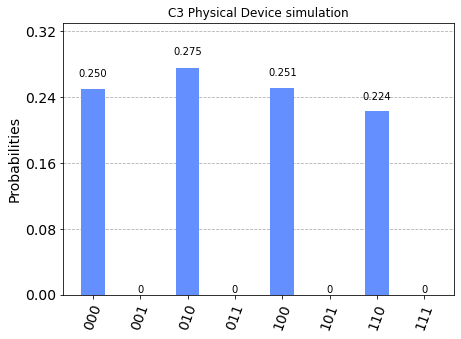

In [9]:
plot_histogram(res_counts, title='C3 Physical Device simulation')

As we can see above, the c3 simulator correctly calculates the populations while accounting for non-optimal pulses and device limitations.

## Run Simulation and verify results on Qiskit simulator

Qiskit uses little-endian bit ordering while most Quantum Computing literature uses big-endian. This is reflected in the reversed ordering of qubit labels here.

Ref: [Basis Vector Ordering in Qiskit](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html#Basis-vector-ordering-in-Qiskit)

/opt/homebrew/Caskroom/miniforge/base/envs/c3-dev/lib/python3.8/site-packages/numpy/linalg/linalg.py:2159: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/Caskroom/miniforge/base/envs/c3-dev/lib/python3.8/site-packages/numpy/linalg/linalg.py:2159: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


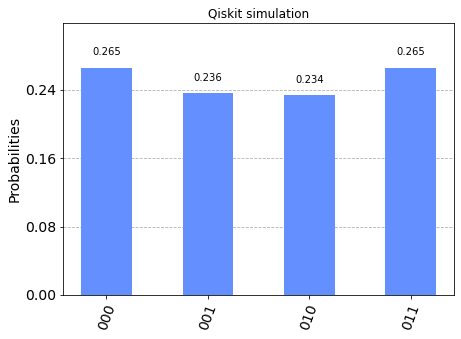

In [10]:
qiskit_simulator = Aer.get_backend('qasm_simulator')
qc.measure([0, 1, 2], [0, 1, 2])
qiskit_result = execute(qc, qiskit_simulator, shots=1000).result()
counts = qiskit_result.get_counts(qc)
plot_histogram(counts, title='Qiskit simulation')